### 173 samples, Final_R is missing for the following sample
137)	MC	air	204	8	180	60	180	500	30	114	0.3	NA	150	0.3	100	0.490196078	486.395	57.78712883	26.00664167	0.467	9.68631173	3	0.422680412	0.541775715	0.521526486	44.36424367

In [1]:
# Import Python libaries
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.optimize import curve_fit
import time as time
# General data management
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn import linear_model
from sklearn import ensemble
from xgboost import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# import pydo
# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(1)

# Machine learning & model visualization tools
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import export_graphviz
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from numpy import cov
from scipy.stats import pearsonr
from scipy import ndimage, misc
import pydot
import math
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_error
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# from sklearn.externals import joblib
# Miscellaneous
import os
import io
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.inspection import partial_dependence, plot_partial_dependence

/home/kianoosh/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
2022-09-22 21:53:36.635913: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-22 21:53:36.635948: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dropped = ['Mass', 'Init_R', 'Fin_R', 'Voltage', 'Res_Volt', 'PulseTime_I', 'I_Mean']
def import_file(filename):
    # Convert to pandas dataframe & take a look
    # filename='FJH_ML.csv'
    df = pd.read_csv(filename, sep=",", encoding='ISO-8859-1', header=1)
    # df = df.drop('Unnamed: 27', axis=1)
    # df = df.drop('Unnamed: 28', axis=1)
    # df = df.drop('Unnamed: 29', axis=1)
    #df = df.dropna()
    # Convert numerical columns to float
    interest = ['Mass', 'Pretreat_voltage', 'Pretreat_highest', 'Voltage', 'PulseTime', 'Cap', 
                'Res_Volt', 'Init_R', 'Fin_R', 'Volt_Drop', 'Res_Drop', 'Yield_Per', 'I_Max', 
                'I_Mean', 'Charge_Tot', 'PulseTime_I', 'I_Final', 'Maxima', 'Graphene_Yield', 
                'TwoDtoG', 'DtoG', 'FWHM 2D']
    for i in range(0, len(interest)):
        col = interest[i]
        df[col] = df[col].astype(float)
    # Fix percentages
    df['Graphene_Yield'] = df['Graphene_Yield']*100
    df['Yield_Per'] = df['Yield_Per']*100
    
    
    
    # Drop problematic data for this particular analysis
    dropped_features = [ 'Res_Drop',
             'PulseTime_I', 'I_Mean', 'Maxima']
    df = df.drop(dropped_features, axis=1)   
    # df = df[df['Yield_Per']>50]
    # Also drop asinine variables
    
    #df = df.drop('Map File ID', axis = 1)
    df = df.drop('Tube Diam', axis = 1)

    # categorize_yield(df)
    # One-hot encode the data using pandas get_dummies
    df = pd.get_dummies(df)
    # df = df[df['Material_CB']>0.5]
    # Drop 1 thing
    # df = df.drop['']
    # Dataset is now stored in a Pandas Dataframe
    # print(df.shape)
    # print(df.head())
    # print(df.isnull().sum())
    return df

def import_file_noOneHot(filename):
# Convert to pandas dataframe & take a look
    # filename='FJH_ML.csv'
    df = pd.read_csv(filename, sep=",", encoding='ISO-8859-1', header=1)
    # df = df.drop('Unnamed: 27', axis=1)
    # df = df.drop('Unnamed: 28', axis=1)
    # df = df.drop('Unnamed: 29', axis=1)
    #df = df.dropna()
    # Convert numerical columns to float
    interest = ['Mass', 'Pretreat_voltage', 'Pretreat_highest', 'Voltage', 'PulseTime', 'Cap', 
                'Res_Volt', 'Init_R', 'Fin_R', 'Volt_Drop', 'Res_Drop', 'Yield_Per', 'I_Max', 
                'I_Mean', 'PulseTime_I', 'I_Final', 'Maxima', 'Graphene_Yield', 'TwoDtoG', 'DtoG', 'FWHM 2D']
    for i in range(0, len(interest)):
        col = interest[i]
        df[col] = df[col].astype(float)
    # Fix percentages
    df['Graphene_Yield'] = df['Graphene_Yield']*100
    df['Yield_Per'] = df['Yield_Per']*100
    # Drop problematic data for this particular analysis
    # df = df[df['Yield_Per']>50]
    # Also drop asinine variables
    try:
        df = df.drop('Map File ID', axis = 1)
    except:
        pass
    df = df.drop('Tube Diam', axis = 1)
    # categorize_yield(df)
    # One-hot encode the data using pandas get_dummies
    # df = pd.get_dummies(df)
    # df = df[df['Material_CB']>0.5]
    # Drop 1 thing
    # df = df.drop['']
    # Dataset is now stored in a Pandas Dataframe
    # print(df.shape)
    # print(df.head())
    # print(df.isnull().sum())
    return df

def leave_one_out_proc(clf):
    # Leave one out evaluation
    # enumerate splits
    y_true, y_pred = list(), list()
    # Create leave one out procedure
    cv = LeaveOneOut()
    for train_ix, test_ix in cv.split(features):
        # split data
        train_features, test_features = features[train_ix, :], features[test_ix, :]
        train_labels, test_labels = labels[train_ix], labels[test_ix]
        clf.fit(train_features, train_labels)
        # evaluate model
        yhat = clf.predict(test_features)
        # store
        y_true.append(test_labels[0])
        y_pred.append(yhat[0])
    print('doneskies')
    return y_true, y_pred, clf

def category_normalization_theonesyoualwaysuse(df):
    groups = df.groupby(['Material'])
    norm_I_Max = []
    norm_charge_tot=[]
    for name, group in groups:
        I_Max_array = np.asfarray(group.I_Max)
        charge_tot_array = np.asfarray(group.Charge_Tot)
        mean_I_Max = np.mean(I_Max_array)
        mean_charge_tot = np.mean(charge_tot_array)
        std_I_Max = np.std(I_Max_array)
        std_charge_tot = np.std(charge_tot_array)
        print("Mean of I Max", name, "is ", mean_I_Max)
        norm_I_Max_cat = np.divide(np.subtract(I_Max_array, mean_I_Max), std_I_Max)
        norm_charge_tot_cat = np.divide(np.subtract(charge_tot_array, mean_charge_tot), std_charge_tot)
        norm_I_Max = np.append(norm_I_Max, norm_I_Max_cat)
        norm_charge_tot = np.append(norm_charge_tot, norm_charge_tot_cat)
    return norm_I_Max, norm_charge_tot

def category_normalization_mass(df):
    groups = df.groupby(['Material'])
    norm_array = []
    for name, group in groups:
        yield_array = np.asfarray(group.Mass)
        mean_yield = np.mean(yield_array)
        std_yield = np.std(yield_array)
        print("Mean of ", name, "is ", mean_yield)
        norm_yield_cat = np.divide(np.subtract(yield_array, mean_yield), std_yield)
        norm_array = np.append(norm_array, norm_yield_cat)
    return norm_array

Mean of I Max CB is  199.5962952631579
Mean of I Max MC is  546.874309090909
Mean of I Max PA is  301.9472116666666
Mean of I Max TCB is  217.5159437837838


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Time'] not found. Falling back to DejaVu Sans.


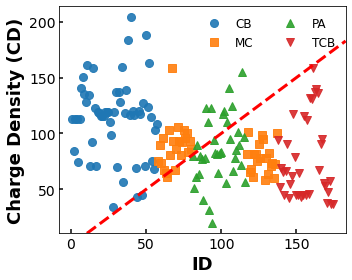

In [3]:
# Plot charge density (CD) for different materials 
fig, ax = plt.subplots(figsize=(5,4))
# Import file
filename='FJH_ML_Final.csv'
df_nothotenc = import_file_noOneHot(filename)
# Create normalized I by category
norm1, norm2 = category_normalization_theonesyoualwaysuse(df_nothotenc)
df_nothotenc['Norm_I_Max'] = norm1
df_nothotenc['Norm_charge_tot'] = norm2
df_nothotenc['charge_density'] = df_nothotenc['Voltage']*df_nothotenc['Cap']/df_nothotenc['Mass']

# df_nothotenc['test_feature'] = (df_nothotenc['Voltage']/df_nothotenc['Mass'])#*df_nothotenc['PulseTime']
# df_nothotenc = df_nothotenc[df_nothotenc['TwoDtoG']<1.5]
# df_nothotenc = df_nothotenc[df_nothotenc['Graphene_Yield']>20]

groups = df_nothotenc.groupby(['Material'])

df_nothotenc['ID'] = list(range(1, df_nothotenc['charge_density'].shape[0]+1))
# Plot
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='14')
counter=0
markers = ['o', 's', '^', 'v']
colors=['blue', 'red', 'green', 'orange']
colors2 = ['maroon', 'darkorange', 'goldenrod', 'dodgerblue']
for name, group in groups:
    ax.plot(group.ID, group.charge_density, marker=markers[counter], alpha=0.9, linestyle='', ms=8, label=name)
    counter+=1
    # Predicted 2D/G
# plt.title('Test Data', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_xlabel('ID', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_ylabel('Charge Density (CD)', fontsize='18', fontname='Time', fontweight='bold')
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Make a red line to show perfect predictions
x2 = np.arange(ymin, ymax*1.1, .01)
y2 = np.arange(ymin, ymax*1.1, .01)
ax.plot(x2,y2, linestyle='--', linewidth = '3', color='red')
leg = plt.legend(frameon="True", prop={'family': 'Arial'})
ax.legend(frameon=False, ncol=2, fontsize=12, loc='upper right')

# Plot
# plt.plot(df_nothotenc['I_Max'],df_nothotenc['Graphene_Yield'], linestyle = 'none', marker = 'o', color='black', markersize='8')
# plt.xlabel('Flash Voltage (V)', fontsize='18', fontname='Arial', fontweight='bold')
# plt.ylabel('D/G Ratio', fontsize='18', fontname='Arial', fontweight='bold')
# Save
plt.tight_layout()
plt.savefig('cvDist_material.png', dpi=300)
plt.show()

In [4]:
# Import file for ML model
filename='FJH_ML_Final.csv'
df1 = import_file_noOneHot(filename)
Imax, chargetot = category_normalization_theonesyoualwaysuse(df1)
yield_array = category_normalization_mass(df1)
df = import_file(filename)
# df['Norm_I_Max'] = Imax
df['Norm_charge_tot'] = df['Charge_Tot']/(df['Mass'])*1000
df['Norm_I_Max'] = df['I_Max']/df['Mass']*1000
# df['Discharge_Rate'] = (df['Volt_Drop']/df['Mass'])/df['PulseTime']
# df['norm_mass'] = yield_array
# df['cap_energy'] = 0.5*df['Voltage']*df['Voltage']*df['Cap']/df['Mass']
df['charge_density'] = df['Voltage']*df['Cap']/df['Mass']
# df['charge_density2'] = df['Volt_Drop']*df['Cap']/df['Mass']
# df['RC'] = df['Init_R']*df['Cap']
# df['test_feature'] = 1/df['Mass']
df['Final_Current_Percent'] = df['I_Final']/df['I_Max']
# convert it to Mega Joule 1e-5
df['heat_power'] = df['Voltage']*df['Voltage']/df['Init_R']*df['PulseTime']*(1e-5)
# df['discharge_per'] = df['Res_Volt']/df['Voltage']
# df['Pretreat_CD'] = df['Pretreat_highest']*df['Cap']/df['Mass']
# df['inv_Mass'] = 1/df['Mass']
#df['average_res'] = (df['Init_R']+df['Fin_R'])/2
#df['Power'] = df['I_Max']*df['I_Max']*df['average_res']/df['Mass']
# df = df.drop('average_res', axis=1)
# df['test_feature'] = df['Res_Volt']/df['Voltage']
#df['FJH_Power'] = df['I_Max']*df['I_Max']*df['Init_R']
# df = df[df['Graphene_Yield']>20]
# Print stats
print(df.shape)
print(df.head())
# print(len(df))
print(sum(df['Material_MC']))

Mean of I Max CB is  199.5962952631579
Mean of I Max MC is  546.874309090909
Mean of I Max PA is  301.9472116666666
Mean of I Max TCB is  217.5159437837838
Mean of  CB is  186.9859649122807
Mean of  MC is  274.92954545454546
Mean of  PA is  283.28055555555557
Mean of  TCB is  319.81081081081084
(174, 33)
   Sample   Mass  Pretreat_voltage  Pretreat_highest  Voltage  PulseTime  \
0       1  200.0              60.0              60.0    235.0     1200.0   
1       2  161.9             150.0              50.0    120.0       50.0   
2       3  200.0             240.0              60.0    235.0      300.0   
3       4  200.0             320.0              80.0    235.0      900.0   
4       5  187.0              60.0              60.0    145.0      125.0   

   Res_Volt    Cap  Init_R  Fin_R  ...  Material_TCB  Atmosphere_air  \
0      56.0   96.0     1.6    0.4  ...             0               0   
1      98.0  114.0     1.6    1.0  ...             0               0   
2     161.0   96.0   

In [15]:
# type of material
Material_CB = np.array (df['Material_CB']).reshape(-1, 1)
Material_MC = np.array (df['Material_MC']).reshape(-1, 1) 
Material_PA = np.array (df['Material_PA']).reshape(-1, 1)
#Material_TCB = np.array (df['Material_TCB']).reshape(-1, 1)
material_type = np.concatenate ((Material_CB, Material_MC, Material_PA), axis=1)
material_type = material_type.astype(np.float32)

# input features
constraint_model0 = pd.DataFrame()
constraint_model0 ['R1_CB'] = material_type[:, 0]
constraint_model0 ['R1_MC'] = material_type[:, 1]
constraint_model0 ['R1_PA'] = material_type[:, 2]
constraint_model0 ['cap'] = df['Cap']
constraint_model0 ['volt'] = df['Voltage']
constraint_model0 ['mass'] = df['Mass']
constraint_model0 ['ptime'] = df['PulseTime']
constraint_model0 ['pre_volt'] = df['Pretreat_voltage']
constraint_model0 ['pre_peak'] = df['Pretreat_highest']

# proxy parameters
constraint_model0 ['I_Max'] = df['I_Max']
constraint_model0 ['charge_tot'] = df['Charge_Tot']
constraint_model0 ['I_Final'] = df['I_Final']

# Final output
constraint_model0 ['GYield'] =       df['Graphene_Yield']
constraint_model0 ['Yield'] =       df['Yield_Per']

# save .csv file for next generation
constraint_model0.to_csv('./constraint_model0.csv')
constraint_model_materialCAT = constraint_model0.copy()
constraint_model_materialCAT['Material'] = df_nothotenc['Material']
constraint_model_materialCAT.to_csv('./constraint_model_materialCAT.csv')
# extra material descriptors
# Cabot BP2000: Tensile Strength=17 MPa, particle size=15nm, specific surface area=1500(m2/g)
# metallurgical coke: grain size=150-210 (um)
# pyrolysis ash: 
# pyrolyzed rubber tire-derived carbon black: 

In [2]:
# reading the output from MOBO
constraint_model = pd.read_csv('constraint_model0.csv', index_col=[0])

# create extra variables 
def categorize_gyield (df, target, threshold):
    yield_cat = []
    for i in range(0, len(df)):
        if df[target].iloc[i] <= threshold:
            yield_cat.append(0)
        else:
            yield_cat.append(1)
    target_cat = target + '_Cat'
    df[target_cat] = yield_cat
    return df[target_cat]

threshold_GYield = 52
constraint_model ['GYield_Cat'] = categorize_gyield (df=constraint_model, 
                                                     target='GYield', 
                                                     threshold=threshold_GYield)
threshold_Yield = 82
constraint_model ['Yield_Cat'] =  categorize_gyield (df=constraint_model, 
                                                     target='Yield', 
                                                     threshold=threshold_Yield)
constraint_model ['charge_density'] = constraint_model ['cap']*\
                                      constraint_model ['volt']/\
                                      constraint_model ['mass']
print ('# of samples Yield  <= {}% in group 0:{}'.format (threshold_Yield, 
                                                       sum (constraint_model['Yield_Cat']==0)))
print ('# of samples Yield  >  {}% in group 1:{}'.format (threshold_Yield, 
                                                       sum (constraint_model['Yield_Cat']==1)))
print ('# of samples GYield <= {}% in group 0:{}'.format (threshold_GYield, 
                                                       sum (constraint_model['GYield_Cat']==0)))
print ('# of samples GYield >  {}% in group 1:{}'.format (threshold_GYield, 
                                                       sum (constraint_model['GYield_Cat']==1)))

constraint_model ['I_Max_norm'] = np.array (constraint_model['I_Max']/constraint_model['mass'])
constraint_model ['charge_tot_norm'] = constraint_model['charge_tot']/(constraint_model['mass'])*1000
constraint_model ['I_Final_perc'] = np.array (constraint_model['I_Final']/constraint_model['I_Max'])
constraint_model.columns

# of samples Yield  <= 82% in group 0:86
# of samples Yield  >  82% in group 1:88
# of samples GYield <= 52% in group 0:84
# of samples GYield >  52% in group 1:90


Index(['R1_CB', 'R1_MC', 'R1_PA', 'cap', 'volt', 'mass', 'ptime', 'pre_volt',
       'pre_peak', 'I_Max', 'charge_tot', 'I_Final', 'GYield', 'Yield',
       'GYield_Cat', 'Yield_Cat', 'charge_density', 'I_Max_norm',
       'charge_tot_norm', 'I_Final_perc'],
      dtype='object')

In [3]:
# proxy (current-time plot) prediction (Final_Current_percent)
features_I_final = np.concatenate ((
    np.array (constraint_model ['charge_density']).reshape(-1, 1),
    np.array (constraint_model ['ptime']).reshape(-1, 1),
    np.array (constraint_model ['R1_CB']).reshape(-1, 1),
    np.array (constraint_model ['R1_MC']).reshape(-1, 1),
    np.array (constraint_model ['R1_PA']).reshape(-1, 1),
    np.array (constraint_model ['pre_volt']).reshape(-1, 1),
    np.array (constraint_model ['pre_peak']).reshape(-1, 1)), axis=1)

I_Final_perc = np.array (constraint_model['I_Final']/constraint_model['I_Max'])
rand=9
indices = np.arange(len(features_I_final))
train_features_I_final, test_features_I_final, train_I_Final_perc, test_I_Final_perc,\
                                                idx_train_Ifinal, idx_test_Ifinal =\
                train_test_split(
    features_I_final, I_Final_perc, indices, test_size = 0.20, random_state = rand)
feature_list = ['charge_denisty',
                'PulseTime',
                'material_CB',
                'material_MC',
                'material_PA',
                'Pretreat_voltage',
                'Pretreat_peak']

In [4]:
r_squareds = list()
r_pearsons = list()
r_squareds_train = list()
MAEs = list()
MAEs_train = list()
start = time.time()
for random_state in range(10):
    xgbr_I_Final_perc = XGBRegressor(max_depth=2, n_estimators=46, gamma=0.01, 
                                     learning_rate=0.115, subsample=0.75, 
                                     min_child_weight=2, random_state=random_state)
    # Train the model on training data
    xgbr_I_Final_perc.fit(train_features_I_final, train_I_Final_perc)
    
    # r2 squared for test data
    pred_test_I_Final_perc = xgbr_I_Final_perc.predict(test_features_I_final)
    r_squared_I_Final_test = r2_score(test_I_Final_perc, pred_test_I_Final_perc)
    r_squareds.append(r_squared_I_Final_test)
    
    # r2 squared for train data
    I_Final_perc_train = xgbr_I_Final_perc.predict(train_features_I_final)
    r_squared_I_Final_train = r2_score(train_I_Final_perc, I_Final_perc_train)
    r_squareds_train.append(r_squared_I_Final_train)  
    
    r_pearson_I_Final_test = pearsonr(test_I_Final_perc.reshape(test_I_Final_perc.shape[0], ), 
                                 pred_test_I_Final_perc.reshape(pred_test_I_Final_perc.shape[0], ))
    r_pearsons.append(r_pearson_I_Final_test[0])   
    
print ('Average of r pearson for test', np.mean(np.array(r_pearsons)))
print ('std of r pearson for test', np.std(np.array(r_pearsons)), '\n')

print ('Average of r_squared for test', np.mean(np.array(r_squareds)))
print ('std of r_squared for test', np.std(np.array(r_squareds)), '\n')

print ('Average of r_squared for train', np.mean(np.array(r_squareds_train)))
print ('std of r_squared for train', np.std(np.array(r_squareds_train)))

xgbr_I_Final_perc.fit(features_I_final, I_Final_perc)
I_Final_perc_predicted = xgbr_I_Final_perc.predict(features_I_final)
# Calculate the absolute errors
errors = abs(I_Final_perc_predicted - I_Final_perc)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')

r_squared_I_Final_all = r2_score(I_Final_perc, I_Final_perc_predicted)
print('r2 score = ', r_squared_I_Final_all)

# Use the forest's predict method on the test data
pred_test_I_Final_perc = xgbr_I_Final_perc.predict(test_features_I_final)
# Calculate the absolute errors
errors_test = abs(pred_test_I_Final_perc - test_I_Final_perc)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_test), 4), 'units.')

r_squared_I_Final_test = r2_score(test_I_Final_perc, pred_test_I_Final_perc)
print('r2 score = ', r_squared_I_Final_test)

Average of r pearson for test 0.8569861773041433
std of r pearson for test 0.008025217573375607 

Average of r_squared for test 0.7328470737520864
std of r_squared for test 0.013086178732118975 

Average of r_squared for train 0.8462368456870057
std of r_squared for train 0.008316668231742548
Mean Absolute Error: 0.0586 units.
r2 score =  0.8496129214796522
Mean Absolute Error: 0.0708 units.
r2 score =  0.8594074491972983


In [5]:
# Get numerical feature importances
importances = list(xgbr_I_Final_perc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
#feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {} Importance: {}'.format(feature, importance)) 
 for (feature, importance) in zip(feature_list, feature_importances)];

Variable: charge_denisty Importance: ('charge_denisty', 0.07)
Variable: PulseTime Importance: ('PulseTime', 0.56)
Variable: material_CB Importance: ('material_CB', 0.04)
Variable: material_MC Importance: ('material_MC', 0.09)
Variable: material_PA Importance: ('material_PA', 0.0)
Variable: Pretreat_voltage Importance: ('Pretreat_voltage', 0.15)
Variable: Pretreat_peak Importance: ('Pretreat_peak', 0.1)


In [6]:
# proxy (current-time plot) prediction (I_Max_norm)
features_I_Max_norm = np.concatenate ((
    np.array (constraint_model ['charge_density']).reshape(-1, 1),
    np.array (constraint_model ['ptime']).reshape(-1, 1),
    np.array (constraint_model ['R1_CB']).reshape(-1, 1),
    np.array (constraint_model ['R1_MC']).reshape(-1, 1),
    np.array (constraint_model ['R1_PA']).reshape(-1, 1),
    np.array (constraint_model ['pre_volt']).reshape(-1, 1),
    np.array (constraint_model ['pre_peak']).reshape(-1, 1)), 
axis=1)
I_Max_norm = np.array (constraint_model ['I_Max_norm'])

rand=9
indices = np.arange(len(features_I_Max_norm))
train_features_I_Max_norm, test_features_I_Max_norm, train_I_Max_norm, test_I_Max_norm,\
      idx_train_I_Max_norm, idx_test_I_Max_norm =\
                      train_test_split(
    features_I_Max_norm, I_Max_norm, indices, test_size = 0.20, random_state = rand)
feature_list = ['charge_denisty',
                'PulseTime',
                'material_CB',
                'material_MC',
                'material_PA',
                'Pretreat_voltage',
                'Pretreat_peak']

In [7]:
r_squareds = list()
r_pearsons = list()
r_squareds_train = list()
MAEs = list()
MAEs_train = list()
start = time.time()
for random_state in range(50):
    xgbr_I_Max_norm = XGBRegressor(max_depth=6, n_estimators=10, gamma=0.001, 
                   learning_rate=0.15, subsample=0.77, min_child_weight=5, 
                   random_state=random_state)
    # Train the model on training data
    xgbr_I_Max_norm.fit(train_features_I_Max_norm, train_I_Max_norm);
    #print('Doneskies')
    I_Max_norm_test = xgbr_I_Max_norm.predict(test_features_I_Max_norm)
    r_squared_I_Max_test = r2_score(test_I_Max_norm, I_Max_norm_test)
    r_squareds.append(r_squared_I_Max_test)
    
    r_pearson_I_Max_test = pearsonr(test_I_Max_norm.reshape(test_I_Max_norm.shape[0],), 
                                 I_Max_norm_test.reshape(I_Max_norm_test.shape[0],)
                                      )
    r_pearsons.append(r_pearson_I_Max_test[0])   
    
    I_Max_norm_train = xgbr_I_Max_norm.predict(train_features_I_Max_norm)
    r_squared_I_Max_train = r2_score(train_I_Max_norm, I_Max_norm_train)
    r_squareds_train.append(r_squared_I_Max_train)    

print ('Average of r pearson for test', np.mean(np.array(r_pearsons)))
print ('std of r pearson for test', np.std(np.array(r_pearsons)), '\n')

print ('Average of r_squared for test', np.mean(np.array(r_squareds)))
print ('std of r_squared for test', np.std(np.array(r_squareds)), '\n')

print ('Average of r_squared for train', np.mean(np.array(r_squareds_train)))
print ('std of r_squared for train', np.std(np.array(r_squareds_train)))

xgbr_I_Max_norm.fit(features_I_Max_norm, I_Max_norm)
# Use the forest's predict method on the test data
I_Max_norm_predicted = xgbr_I_Max_norm.predict(features_I_Max_norm)
# Calculate the absolute errors
errors = abs(I_Max_norm_predicted - I_Max_norm)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')

r_squared_I_Max_all = r2_score(I_Max_norm, I_Max_norm_predicted)
print('r2 score = ', r_squared_I_Max_all)

# Use the forest's predict method on the test data
I_Max_norm_test = xgbr_I_Max_norm.predict(test_features_I_Max_norm)
# Calculate the absolute errors
errors_test = abs(I_Max_norm_test - test_I_Max_norm)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_test), 4), 'units.')

r_squared_I_Max_test = r2_score(test_I_Max_norm, I_Max_norm_test)
print('r2 score = ', r_squared_I_Max_test)

Average of r pearson for test 0.7954654774725128
std of r pearson for test 0.014739888180487371 

Average of r_squared for test 0.5884601963210155
std of r_squared for test 0.0193814851867795 

Average of r_squared for train 0.6974071003436204
std of r_squared for train 0.0087563386398684
Mean Absolute Error: 0.2818 units.
r2 score =  0.7006106468834863
Mean Absolute Error: 0.2947 units.
r2 score =  0.7102280215542716


In [8]:
# proxy (current-time plot) prediction (charge_tot_norm)
features_charge_tot_norm = np.concatenate ((
    np.array (constraint_model ['charge_density']).reshape(-1, 1),
    np.array (constraint_model ['ptime']).reshape(-1, 1),
    np.array (constraint_model ['R1_CB']).reshape(-1, 1),
    np.array (constraint_model ['R1_MC']).reshape(-1, 1),
    np.array (constraint_model ['R1_PA']).reshape(-1, 1),
    np.array (constraint_model ['pre_volt']).reshape(-1, 1),
    np.array (constraint_model ['pre_peak']).reshape(-1, 1)
), axis=1)

charge_tot_norm = np.array (constraint_model ['charge_tot_norm'])
rand=9
indices = np.arange(len(features_charge_tot_norm))
train_features_charge_tot_norm, test_features_charge_tot_norm, train_charge_tot_norm,\
    test_charge_tot_norm, idx_train_charge_tot_norm, idx_test_charge_tot_norm = \
                      train_test_split(features_charge_tot_norm, charge_tot_norm, 
                                       indices, test_size = 0.20, random_state = rand)
feature_list = ['charge_denisty',
                'PulseTime',
                'material_CB',
                'material_MC',
                'material_PA',
                'Pretreat_voltage',
                'Pretreat_peak']

In [9]:
r_squareds = list()
r_pearsons = list()
r_squareds_train = list()
MAEs = list()
MAEs_train = list()
start = time.time()
for random_state in range(100):
    xgbr_charge_tot_norm = XGBRegressor(max_depth=5, n_estimators=14, gamma=0.001, 
                   learning_rate=0.149, subsample=0.8, min_child_weight=2, 
                  random_state=random_state)
    # Train the model on training data
    xgbr_charge_tot_norm.fit(train_features_charge_tot_norm, train_charge_tot_norm);
    #print('Doneskies')
    charge_tot_norm_test = xgbr_charge_tot_norm.predict(test_features_charge_tot_norm)
    r_squared_I_Max_test = r2_score(test_charge_tot_norm, charge_tot_norm_test)
    r_squareds.append(r_squared_I_Max_test)
    
    r_pearson_I_Max_test = pearsonr(test_charge_tot_norm.reshape(test_charge_tot_norm.shape[0],), 
                                 charge_tot_norm_test.reshape(charge_tot_norm_test.shape[0],)
                                      )
    r_pearsons.append(r_pearson_I_Max_test[0])   
    
    charge_tot_norm_train = xgbr_charge_tot_norm.predict(train_features_charge_tot_norm)
    r_squared_I_Max_train = r2_score(train_charge_tot_norm, charge_tot_norm_train)
    r_squareds_train.append(r_squared_I_Max_train)    

print ('Average of r pearson for test', np.mean(np.array(r_pearsons)))
print ('std of r pearson for test', np.std(np.array(r_pearsons)), '\n')

print ('Average of r_squared for test', np.mean(np.array(r_squareds)))
print ('std of r_squared for test', np.std(np.array(r_squareds)), '\n')

print ('Average of r_squared for train', np.mean(np.array(r_squareds_train)))
print ('std of r_squared for train', np.std(np.array(r_squareds_train)))


xgbr_charge_tot_norm.fit(features_charge_tot_norm, charge_tot_norm)
# Use the forest's predict method on the test data
charge_tot_norm_predicted = xgbr_charge_tot_norm.predict(features_charge_tot_norm)
# Calculate the absolute errors
errors = abs(charge_tot_norm_predicted - charge_tot_norm)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')

r_squared_I_Max_all = r2_score(charge_tot_norm, charge_tot_norm_predicted)
print('r2 score = ', r_squared_I_Max_all)

# Use the forest's predict method on the test data
charge_tot_norm_test = xgbr_charge_tot_norm.predict(test_features_charge_tot_norm)
# Calculate the absolute errors
errors_test = abs(charge_tot_norm_test - test_charge_tot_norm)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_test), 4), 'units.')

r_squared_I_Max_test = r2_score(test_charge_tot_norm, charge_tot_norm_test)
print('r2 score = ', r_squared_I_Max_test)

Average of r pearson for test 0.7776820772032168
std of r pearson for test 0.026180429425068055 

Average of r_squared for test 0.5805218288376035
std of r_squared for test 0.03742857461930912 

Average of r_squared for train 0.7271858293036708
std of r_squared for train 0.011079750012539205
Mean Absolute Error: 11.171 units.
r2 score =  0.7408999916995671
Mean Absolute Error: 10.486 units.
r2 score =  0.7926813990936905


In [10]:
# Final GYield and Yield input features
features_final = np.concatenate ((
    np.array (constraint_model ['charge_density']).reshape(-1, 1),
    np.array (constraint_model ['ptime']).reshape(-1, 1),
    np.array (constraint_model ['R1_CB']).reshape(-1, 1),
    np.array (constraint_model ['R1_MC']).reshape(-1, 1),
    np.array (constraint_model ['R1_PA']).reshape(-1, 1),
    np.array (constraint_model ['pre_volt']).reshape(-1, 1),
    np.array (constraint_model ['pre_peak']).reshape(-1, 1),
    I_Final_perc_predicted.reshape(-1, 1),
    I_Max_norm_predicted.reshape(-1, 1),
    charge_tot_norm_predicted.reshape(-1, 1)), axis=1)

In [14]:
# GYield final
GYield_Cat = np.array (constraint_model ['GYield_Cat'])
rand=10
indices = np.arange(len(features_final))
train_features_gyield, test_features_gyield, train_gyield, test_gyield, idx_train_gyield, idx_test_gyield = \
                      train_test_split(features_final, GYield_Cat, 
                                       indices, test_size = 0.20, random_state = rand)
feature_list = ['charge_denisty',
                'PulseTime',
                'material_CB',
                'material_MC',
                'material_PA',
                'Pretreat_voltage',
                'Pretreat_peak',
                'I_Final_perc_predicted',
                'I_Max_norm_predicted',
                'charge_tot_norm_predicted']

In [22]:
lr_aucs = list()
train_lr_aucs = list()
start = time.time()
for random_state in range(1):
    # Instantiate model with 1000 decision trees
    mlpc_gyield = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='logistic', 
                   alpha=0.005, learning_rate = 'constant', solver='adam')

    # Train the model on training data
    mlpc_gyield.fit(train_features_gyield, train_gyield.ravel());
    # Use the forest's predict method on the test data
    predictions = mlpc_gyield.predict(test_features_gyield)
    # Calculate the absolute errors
    # Print out the mean absolute error (mae)
    #print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')
    lr_auc = roc_auc_score(test_gyield, predictions)
    lr_aucs.append(lr_auc)
    
    pred_train = mlpc_gyield.predict(train_features_gyield)
    train_lr_auc = roc_auc_score(train_gyield, pred_train)
    train_lr_aucs.append(train_lr_auc)
    #print (lr_auc, train_lr_auc)

# train accuracy
print ('mean lr_auc for test:', np.mean(lr_aucs))
print ('mean lr_auc for train:', np.mean(train_lr_aucs))


pred_train = mlpc_gyield.predict(train_features_gyield)
pred_test = mlpc_gyield.predict(test_features_gyield)

total_acc = accuracy_score(test_gyield, pred_test)
print ('simple percentage of correct guesses for test: ', total_acc)
total_acc = accuracy_score(train_gyield, pred_train)
print ('simple percentage of correct guesses for train: ', total_acc)
end = time.time()
print ('time is: ', end-start)


mean lr_auc for test: 0.6309523809523809
mean lr_auc for train: 0.9424430641821946
simple percentage of correct guesses for test:  0.6
simple percentage of correct guesses for train:  0.9424460431654677
time is:  0.6131618022918701


/home/kianoosh/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
lr_aucs = list()
train_lr_aucs = list()
start = time.time()
for random_state in range(100):
    # Instantiate model with 1000 decision trees
    xgbc_gyield = XGBClassifier(
        max_depth=3, n_estimators=30, gamma=0.01, eval_metric='error',
        learning_rate=0.115, subsample=0.75, min_child_weight=3, 
        use_label_encoder=False, random_state=random_state
    )

    # Train the model on training data
    xgbc_gyield.fit(train_features_gyield, train_gyield.ravel());
    # Use the forest's predict method on the test data
    predictions = xgbc_gyield.predict(test_features_gyield)
    # Calculate the absolute errors
    # Print out the mean absolute error (mae)
    #print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')
    lr_auc = roc_auc_score(test_gyield, predictions)
    lr_aucs.append(lr_auc)
    
    pred_train = xgbc_gyield.predict(train_features_gyield)
    train_lr_auc = roc_auc_score(train_gyield, pred_train)
    train_lr_aucs.append(train_lr_auc)
    #print (lr_auc, train_lr_auc)

# train accuracy
print ('mean lr_auc for test:', np.mean(lr_aucs))
print ('mean lr_auc for train:', np.mean(train_lr_aucs))


pred_train = xgbc_gyield.predict(train_features_gyield)
pred_test = xgbc_gyield.predict(test_features_gyield)

total_acc = accuracy_score(test_gyield, pred_test)
print ('simple percentage of correct guesses for test: ', total_acc)
total_acc = accuracy_score(train_gyield, pred_train)
print ('simple percentage of correct guesses for train: ', total_acc)
end = time.time()
print ('time is: ', end-start)

mean lr_auc for test: 0.8340476190476189
mean lr_auc for train: 0.8863737060041409
simple percentage of correct guesses for test:  0.8285714285714286
simple percentage of correct guesses for train:  0.8992805755395683
time is:  9.655226230621338


In [24]:
# Final Yield
Yield_Cat = np.array (constraint_model ['Yield_Cat'])
rand=0
indices = np.arange(len(features_I_final))
train_features_yield, test_features_yield, train_yield, test_yield, idx_train_yield, idx_test_yield = \
                      train_test_split(features_final, Yield_Cat, 
                                       indices, test_size = 0.20, random_state = rand)
feature_list = ['charge_denisty',
                'PulseTime',
                'material_CB',
                'material_MC',
                'material_PA',
                'Pretreat_voltage',
                'Pretreat_peak',
                'I_Final_perc_predicted',
                'I_Max_norm_predicted',
                'charge_tot_norm_predicted']

In [25]:
lr_aucs = list()
train_lr_aucs = list()
start = time.time()
for random_state in range(50):
    # Instantiate model with 1000 decision trees
    xgbc_yield = XGBClassifier(
        max_depth=2, use_label_encoder=False, n_estimators=50, gamma=0.01, eval_metric='error',
        learning_rate=0.1, subsample=0.75, min_child_weight=2, random_state=random_state
    )

    # Train the model on training data
    xgbc_yield.fit(train_features_yield, train_yield.ravel());
    # Use the forest's predict method on the test data
    predictions = xgbc_yield.predict(test_features_yield)
    # Calculate the absolute errors
    # Print out the mean absolute error (mae)
    #print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')
    lr_auc = roc_auc_score(test_yield, predictions)
    lr_aucs.append(lr_auc)
    
    pred_train = xgbc_yield.predict(train_features_yield)
    train_lr_auc = roc_auc_score(train_yield, pred_train)
    train_lr_aucs.append(train_lr_auc)
    #print (lr_auc, train_lr_auc)

# train accuracy
print ('mean lr_auc for test:', np.mean(lr_aucs))
print ('mean lr_auc for train:', np.mean(train_lr_aucs))


pred_train = xgbc_yield.predict(train_features_yield)
pred_yield_test = xgbc_yield.predict(test_features_yield)

total_acc = accuracy_score(test_yield, pred_yield_test)
print ('simple percentage of correct guesses for test: ', total_acc)
total_acc = accuracy_score(train_yield, pred_train)
print ('simple percentage of correct guesses for train: ', total_acc)
end = time.time()
print ('time is: ', end-start)



mean lr_auc for test: 0.7444405594405594
mean lr_auc for train: 0.8340083333333334
simple percentage of correct guesses for test:  0.7142857142857143
simple percentage of correct guesses for train:  0.841726618705036
time is:  7.526777982711792


In [ ]:
# change the confidence, 
# reduce False positive (bad conditions do not pass the constraint)
pred_prob_yield_test = xgbc_yield.predict_proba(test_features_yield)[:, 1]
print (pred_prob_yield_test)
pred_yield_test_60per = [0 if prob <= 0.6 else 1 for prob in pred_prob_yield_test]
print (pred_yield_test_60per)
total_acc = accuracy_score(test_yield, pred_yield_test_60per)
print (total_acc)

# Define classifiers
conversion_indices = {'aC': 0,'G': 1}

# Plot confusion matrix
confusion_matrix = np.zeros((len(conversion_indices), len(conversion_indices)))

# First row is Graphene Yield < 50% == 0
# Second row is Graphene Yield > 50% == 0
for i in range(len(test_yield)):
    confusion_matrix[int(test_yield[i]), int(pred_yield_test_60per[i])] += 1
    
print("\n===== Confusion Matrix (between subject's) =====")
print(confusion_matrix)

for i in range(confusion_matrix.shape[0]):
    # print(sum(confusion_matrix[i, :]))
    confusion_matrix[i, :] = confusion_matrix[i, :]/sum(confusion_matrix[i, :])
    
print("\n===== Normalized Confusion Matrix (between subject's) =====")
print(confusion_matrix)

print("\n===== Colormap of Normalized Confusion Matrix (between subject's) =====")
# Format plot
ax = plt.axes()
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
imshow_kwargs = {'cmap': 'Blues',}
ax.set_yticks([0, 1])
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.imshow(confusion_matrix, **imshow_kwargs)
# plt.xlabel('Predicted', fontname="Arial", fontsize="20", fontweight = "bold")
# plt.ylabel('Actual', fontname="Arial", fontsize="20", fontweight = "bold")
cb = plt.colorbar()
cb.ax.tick_params(labelsize='16')
# plt.show()

metric = classification_report(test_yield, pred_yield_test_60per)
print(metric)

# Format and save
plt.tight_layout()
# plt.savefig('ConfusionMatrixClassifier.png', dpi=300) # Change file name
# plt.show(

In [ ]:
# classification accuracy for train data
# Define classifiers
conversion_indices = {
  'aC': 0,
  'G': 1,
}

# Plot confusion matrix
confusion_matrix = np.zeros((len(conversion_indices), len(conversion_indices)))

for i in range(len(train_yield)):
    confusion_matrix[int(train_yield[i]), int(pred_train[i])] += 1
    
print("\n===== Confusion Matrix (between subject's) =====")
print(confusion_matrix)

for i in range(confusion_matrix.shape[0]):
    # print(sum(confusion_matrix[i, :]))
    confusion_matrix[i, :] = confusion_matrix[i, :]/sum(confusion_matrix[i, :])
    
print("\n===== Normalized Confusion Matrix (between subject's) =====")
print(confusion_matrix)

print("\n===== Colormap of Normalized Confusion Matrix (between subject's) =====")
# Format plot
ax = plt.axes()
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
imshow_kwargs = {
    'cmap': 'Blues',
}
ax.set_yticks([0, 1])
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.imshow(confusion_matrix, **imshow_kwargs)
# plt.xlabel('Predicted', fontname="Arial", fontsize="20", fontweight = "bold")
# plt.ylabel('Actual', fontname="Arial", fontsize="20", fontweight = "bold")
cb = plt.colorbar()
cb.ax.tick_params(labelsize='16')
# plt.show()

metric = classification_report(train_yield, pred_train)
print(metric)

# Format and save
plt.tight_layout()
# plt.savefig('ConfusionMatrixClassifier.png', dpi=300) # Change file name
# plt.show(

In [ ]:
# Get numerical feature importances
importances = list(xgbc_gyield.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
#feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {} Importance: {}'.format(feature, importance)) 
 for (feature, importance) in zip(feature_list, feature_importances)];

In [ ]:
# Affix variables
testy = test_labels
testX = test_new_features
trainX = train_new_features
trainy = train_labels

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
# model = RandomForestClassifier(max_depth=4, n_estimators=200)

# Instantiate Models
model1 = XGBClassifier(max_depth=10, n_estimators=50, gamma=0.01, eval_metric='logloss',
                   learning_rate=0.2, subsample=0.75, min_child_weight=5, use_label_encoder=False)
model1.fit(trainX, trainy)

model2 = RandomForestClassifier(max_depth=10, min_samples_split=2)
model2.fit(trainX, trainy)

model3 = DecisionTreeClassifier(max_depth=3, min_samples_split=2)
model3.fit(trainX, trainy)

model4 = LogisticRegression(solver='lbfgs')
model4.fit(trainX, trainy)

model5 = MLPClassifier(hidden_layer_sizes=(200, 200, 200), activation='logistic', 
                   alpha=0.05, learning_rate = 'constant', solver='adam')
model5.fit(trainX, trainy)


model6 = GaussianNB()
model6.fit(trainX, trainy)

# Start here tomorrow, go through and copy the hyperparameters from below. Don't count on being able to find the same ones. 
###
###
###

# predict probabilities
lr_probs1 = model1.predict_proba(testX)
lr_probs2 = model2.predict_proba(testX)
lr_probs3 = model3.predict_proba(testX)
lr_probs4 = model4.predict_proba(testX)
lr_probs5 = model5.predict_proba(testX)
lr_probs6 = model6.predict_proba(testX)

# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
lr_probs2 = lr_probs2[:, 1]
lr_probs3 = lr_probs3[:, 1]
lr_probs4 = lr_probs4[:, 1]
lr_probs5 = lr_probs5[:, 1]
lr_probs6 = lr_probs6[:, 1]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc1 = roc_auc_score(testy, lr_probs1)
lr_auc2 = roc_auc_score(testy, lr_probs2)
lr_auc3 = roc_auc_score(testy, lr_probs3)
lr_auc4 = roc_auc_score(testy, lr_probs4)
lr_auc5 = roc_auc_score(testy, lr_probs5)
lr_auc6 = roc_auc_score(testy, lr_probs6)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc1))
print('Logistic: ROC AUC=%.3f' % (lr_auc2))
print('Logistic: ROC AUC=%.3f' % (lr_auc3))
print('Logistic: ROC AUC=%.3f' % (lr_auc4))
print('Logistic: ROC AUC=%.3f' % (lr_auc5))
print('Logistic: ROC AUC=%.3f' % (lr_auc6))

# calculate roc curves: It will consider different threshold to compare the prob. 
# 50% is an usual number for binary classification. 
drop_intermediate = True
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr1, lr_tpr1, thresshold = roc_curve(testy, lr_probs1, drop_intermediate=drop_intermediate)
lr_fpr2, lr_tpr2, _ = roc_curve(testy, lr_probs2, drop_intermediate=drop_intermediate)
lr_fpr3, lr_tpr3, _ = roc_curve(testy, lr_probs3, drop_intermediate=drop_intermediate)
lr_fpr4, lr_tpr4, _ = roc_curve(testy, lr_probs4, drop_intermediate=drop_intermediate)
lr_fpr5, lr_tpr5, _ = roc_curve(testy, lr_probs5, drop_intermediate=drop_intermediate)
lr_fpr6, lr_tpr6, _ = roc_curve(testy, lr_probs6, drop_intermediate=drop_intermediate)

fig, ax = plt.subplots(figsize=(5,4))
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr1, lr_tpr1, marker='o', label='XGB-C', color='maroon')
pyplot.plot(lr_fpr2, lr_tpr2, marker='s', label='RF-C', color='darkorange')
pyplot.plot(lr_fpr3, lr_tpr3, marker='^', label='DT-C', color='salmon')
pyplot.plot(lr_fpr4, lr_tpr4, marker='v', label='LogR-C', color='goldenrod')
pyplot.plot(lr_fpr5, lr_tpr5, marker='<', label='MLP-C', color='skyblue')
pyplot.plot(lr_fpr6, lr_tpr6, marker='>', label='GNB-C', color='dodgerblue')

# axis labels
pyplot.xlabel('False Positive Rate', fontname="Arial", fontsize="20", fontweight = "bold")
pyplot.ylabel('True Positive Rate', fontname="Arial", fontsize="20", fontweight = "bold")
# show the legend
leg = plt.legend(frameon="True", prop={'family': 'Arial'})
ax.legend(frameon=False, ncol=1)
# show the plot
# Format and save
plt.tight_layout()
# plt.savefig('ROCcurves.png', dpi=300) # Change file name
plt.show()